

# Project: Investigate a Dataset (TMDB-Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from the Movie Database (TMDb).

### Questions
#### Q1. Which the Six movies are most famous based on popularity score ?
#### Q2. Which year were the lesser of movies released ? and how many movies released at that year?
#### Q3. What is the five movies got lowest rated based on the vote average?
#### Q4. Top Highest revenue Movies of all time Worldwide
#### Q5. What is the budget trends of movies from year to year?
#### Q6. Is the release year effect on popularity score of the movies?




In [249]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [250]:
#Importing data from a CSV file and viewing first five rows of the DataFrame
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [251]:
#Number of rows and columns
df.shape

(10866, 21)

In [252]:
#Index, Datatybe and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



### Data Cleaning (Replace this with more specific notes!)

In [253]:
#Convert the Dtype 
df['release_date'] = pd.to_datetime(df['release_date'])

In [254]:
#Type of each column
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [255]:
#columns I'm not going to use
df.drop(labels = ['imdb_id','cast','homepage','director','tagline','keywords','overview','production_companies','genres'],axis =1,inplace =True)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   budget          10866 non-null  int64         
 3   revenue         10866 non-null  int64         
 4   original_title  10866 non-null  object        
 5   runtime         10866 non-null  int64         
 6   release_date    10866 non-null  datetime64[ns]
 7   vote_count      10866 non-null  int64         
 8   vote_average    10866 non-null  float64       
 9   release_year    10866 non-null  int64         
 10  budget_adj      10866 non-null  float64       
 11  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 1018.8+ KB


In [257]:
#Checks for null values
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [258]:
#Checking if our dataset contains zero or less than zero
BA_zero = df[df.budget_adj == 0]
B_zero = df[df.budget == 0]
RA_zero = df[df.revenue_adj == 0]
R_zero = df[df.revenue == 0]

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I trimmed and cleaned my data, I'm ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

### Q1. Which the Six movies are most famous based on popularity score ?


In [259]:
#Sorts values by popularity in descending order
movies_pop = df.sort_values(by = 'popularity', ascending = False).loc[:,['popularity','original_title']][0:6]


##### Based on the below Bar plot we can found the Jurassic world movie got the highest value of Popularity a


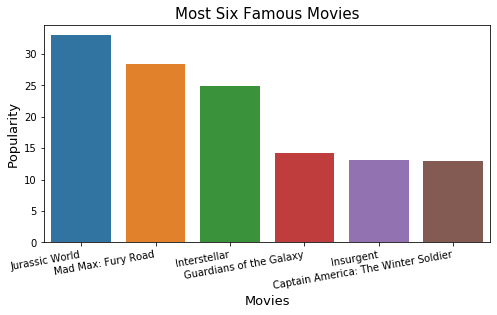

In [260]:
#Shape size
plt.figure(figsize = (8,4))
#Bar plot
ax=sns.barplot(x = 'original_title' , y = 'popularity', data =movies_pop) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, fontsize = 10 , ha="right") #Size of the font and rotation
plt.xlabel('Movies' , fontsize = 13) #Name of xlabel
plt.ylabel('Popularity' , fontsize = 13) #Name of Ylabel
plt.title('Most Six Famous Movies',fontsize = 15) #Name of the chart
plt.show()

### Q2. Which year were the lesser of movies released ? and how many movies released at that year?

In [261]:
#Counts the movies released for each year and Sorts values in ascending order
df['release_year'].value_counts(ascending = True)[0:5]


1961    31
1969    31
1960    32
1962    32
1963    34
Name: release_year, dtype: int64

### Q3. What is the five movies got lowest rated based on the vote average?

In [262]:
#Sorts values by vote_average in ascending order
df.sort_values(by = 'vote_average' , ascending = True).loc[:,['vote_average','original_title']][0:5]

,vote_average,original_title
10865,1.5,Manos: The Hands of Fate
7772,1.5,Transmorphers
4882,2.0,Jurassic Shark
3822,2.1,Sand Sharks
7220,2.1,Superbabies: Baby Geniuses 2


### Q4. Top Highest revenue Movies of all time Worldwide

In [263]:
df.sort_values(by = 'revenue',ascending = False).loc[:,['revenue', 'original_title']][0:10]

,revenue,original_title
1386,2781505847,Avatar
3,2068178225,Star Wars: The Force Awakens
5231,1845034188,Titanic
4361,1519557910,The Avengers
0,1513528810,Jurassic World
4,1506249360,Furious 7
14,1405035767,Avengers: Age of Ultron
3374,1327817822,Harry Potter and the Deathly Hallows: Part 2
5422,1274219009,Frozen
5425,1215439994,Iron Man 3


In [264]:
movies_revenue = df.sort_values(by = 'revenue',ascending = False).loc[:,['revenue', 'original_title']][0:10]

##### Based on the below Line chart we can found the Avatar movie got the highest  revenue (2781505847$)

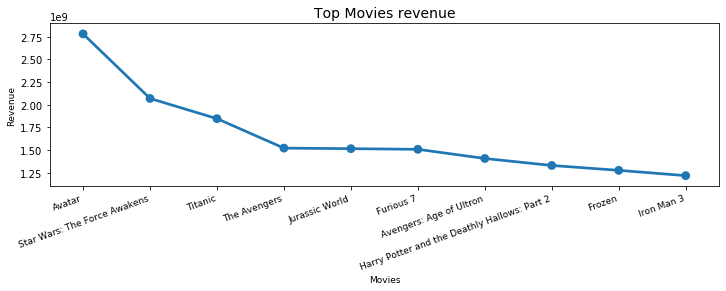

In [265]:
#Chart size
plt.figure(figsize = (12,3))
#Line chart
ag=sns.pointplot(x= "original_title", y= "revenue", data= movies_revenue);
ag.set_xticklabels(ag.get_xticklabels(), rotation = 20,ha='right', fontsize = 9);#Size of the font and rotation
plt.xlabel('Movies',fontsize = 9); #Name of xlabel
plt.ylabel('Revenue',fontsize = 9);#Name of ylabel
plt.title('Top Movies revenue',fontsize = 14); #Name of the chart
plt.show()

### Q5. What is the budget trends of movies from year to year?


In [266]:
#Sorts values by budget in descending order
def sort_by_budget(df):
    return df.sort_values(by = 'budget_adj',ascending = False)['original_title'].head(1)

In [267]:
df.groupby('release_year').apply(sort_by_budget) #applies a function  across each 

release_year       
1960          10143                                      Spartacus
1961          10112                                West Side Story
1962          9856                            How the West Was Won
1963          10443                                      Cleopatra
1964          9887                                    My Fair Lady
1965          10716                   The Greatest Story Ever Told
1966          10824                 The Bible: In the Beginning...
1967          10409                                The Dirty Dozen
1968          9719                           2001: A Space Odyssey
1969          10730                              Battle of Britain
1970          10656                              Tora! Tora! Tora!
1971          9931                        Bedknobs and Broomsticks
1972          7269                                   The Godfather
1973          10593                                     Robin Hood
1974          9785                        

### Q6. Is the release year effect on popularity score of the movies?


In [268]:
#Finds the median of each columns
gb_year= df.groupby('release_year').median()

In [269]:
gb_year['release_year'] = gb_year.index.get_level_values(0)

##### - Based on the below Scatter plot there is a positive correlation between release year and popularity
##### - The trend  of the below scatter plot is increases year by year



<Figure size 1080x792 with 0 Axes>

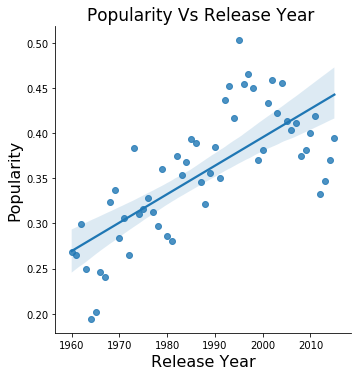

In [270]:
#Chart size
plt.figure(figsize = (15,11)) 
#Scatter plot
sns.lmplot(x = 'release_year', y = 'popularity', data = gb_year); 
plt.xlabel('Release Year', fontsize = 16); #Name of xlabel
plt.ylabel('Popularity', fontsize = 16); #Name of ylabel
plt.title('Popularity Vs Release Year ',fontsize = 17); #Name of the chart

### Conclusion

##### After following the analysis steps on my data, now I've a general overview of the data and I found answers to my fourth questions as the below results:
- The most famous movie based on popularity score is ( Jurrasic World ).
- In 1961 and 1969 only 31 movies are released, and that result was the lowest value at all the years.
- (Manos: The Hands of Fate) and (Transmorphers) are the only two movies got the lowest rated of vote average 1.5
- (Avatar) the highest grossing movie at all the years.
-
- Popularity of movies incresing year by year and this means there's a positive correlation between the year and popularity

### Limitations

 There is some missing values or nan values which can effect on results of the data, also the revenue and budget columns they don't have currency unit! also in those two columns had many errorneous zero values l which would have definitely affected my analysis whereas dropping rows with missing values could have effect on my overall analysis.

In [271]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255